In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble  import RandomForestClassifier
# from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data = pd.read_csv("shopping_trends_updated.csv")

In [3]:
data.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [4]:
data.tail(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3890,3891,35,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually
3891,3892,36,Female,Dress,Clothing,30,Colorado,L,Peach,Winter,4.7,No,Free Shipping,No,No,6,Bank Transfer,Quarterly
3892,3893,35,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3893,3894,21,Female,Hat,Accessories,64,Massachusetts,L,White,Fall,3.3,No,Store Pickup,No,No,29,Bank Transfer,Bi-Weekly
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [5]:
data.shape

(3900, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
data.isna().sum().sum()

0

In [8]:
data.duplicated().sum()

0

# Exploratory data analysis

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [10]:
data.describe(include="object").T

,count,unique,top,freq
Gender,3900,2,Male,2652
Item Purchased,3900,25,Blouse,171
Category,3900,4,Clothing,1737
Location,3900,50,Montana,96
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Shipping Type,3900,6,Free Shipping,675
Discount Applied,3900,2,No,2223


#### By seeing the descriptional stats above we can conclude that their is no outliers...

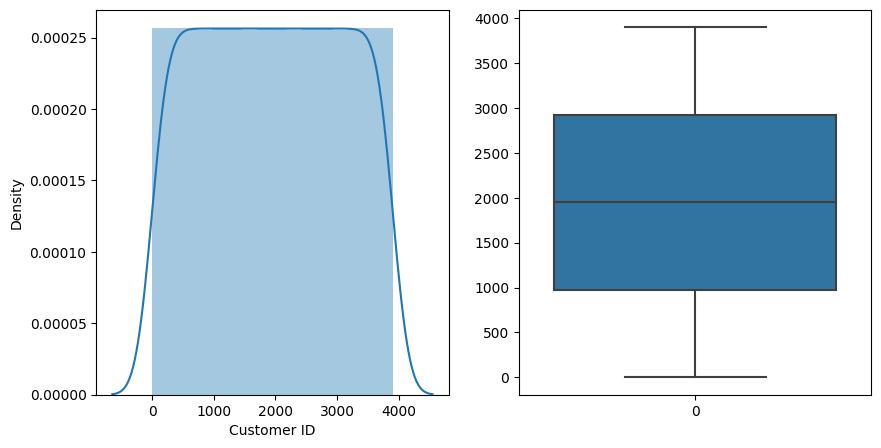

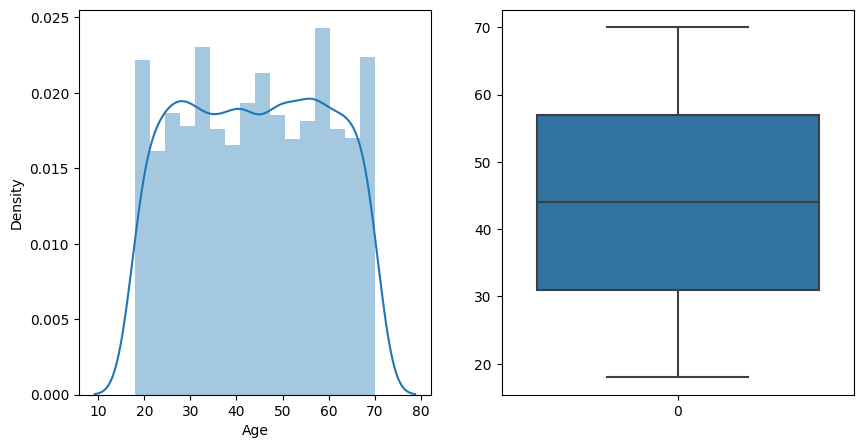

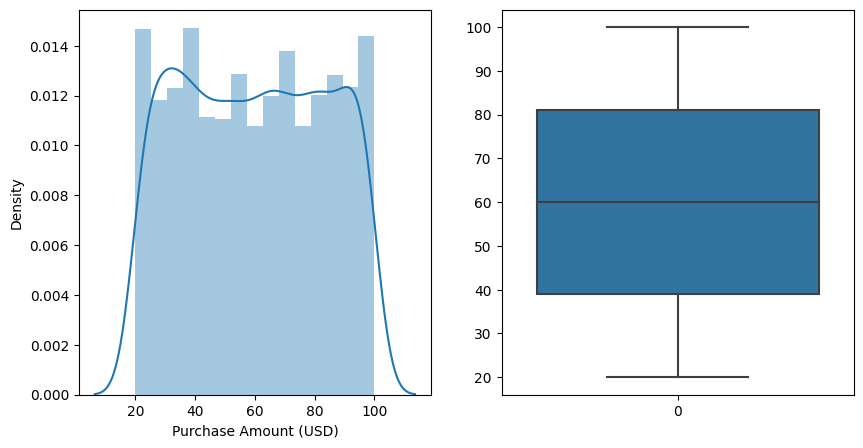

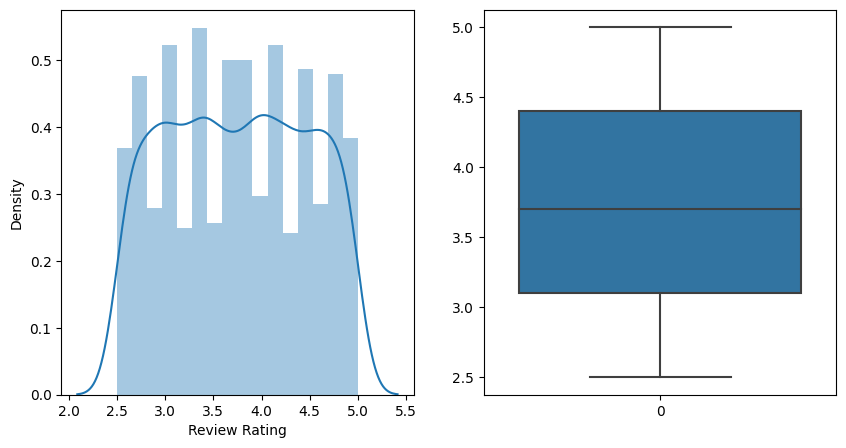

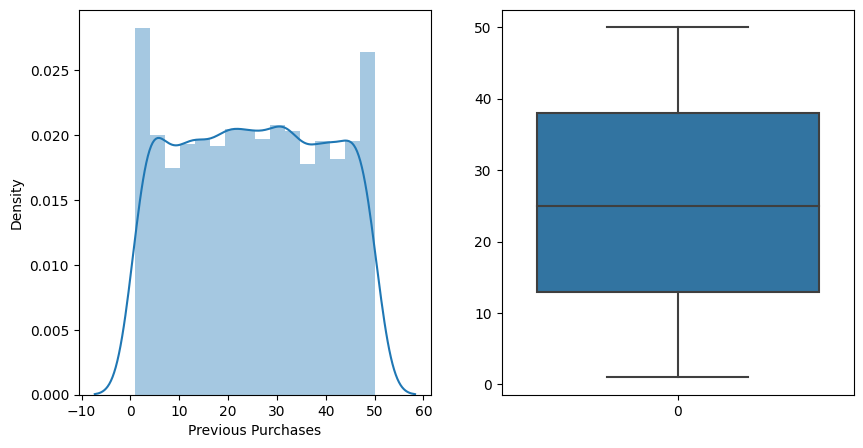

In [11]:
for i in data.select_dtypes(["int","float"]).columns:
    fig ,(fig1,fig2)=plt.subplots(1,2,figsize=(10,5))
    sns.distplot(data[i],ax=fig1)
    sns.boxplot(data[i],ax=fig2)
    plt.show()

## here we can conclude that their is no outliers and data is normally distributed

# data insights

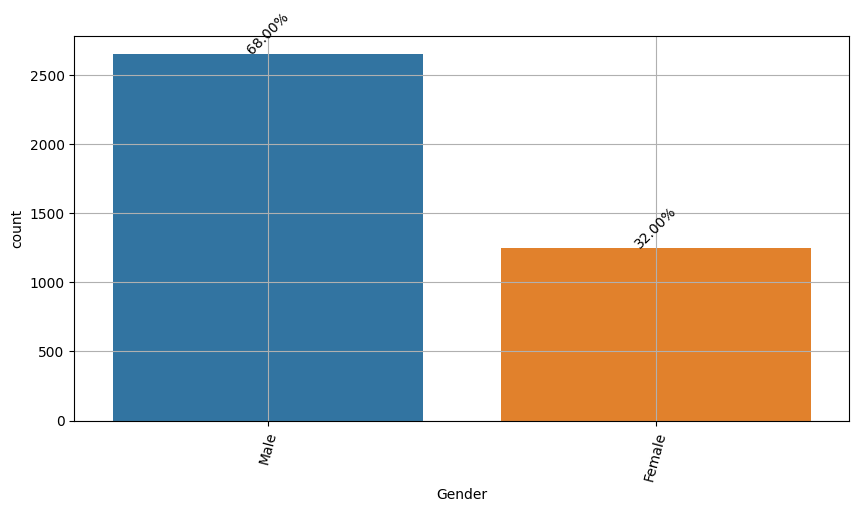

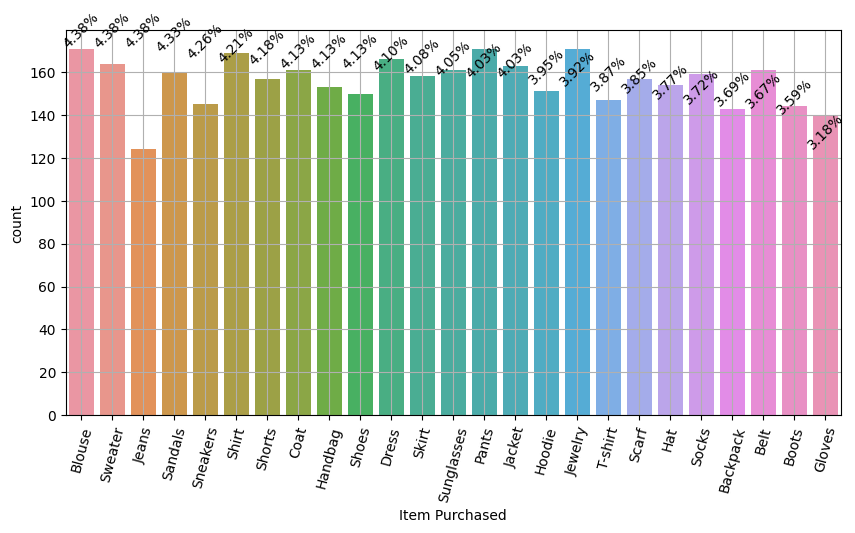

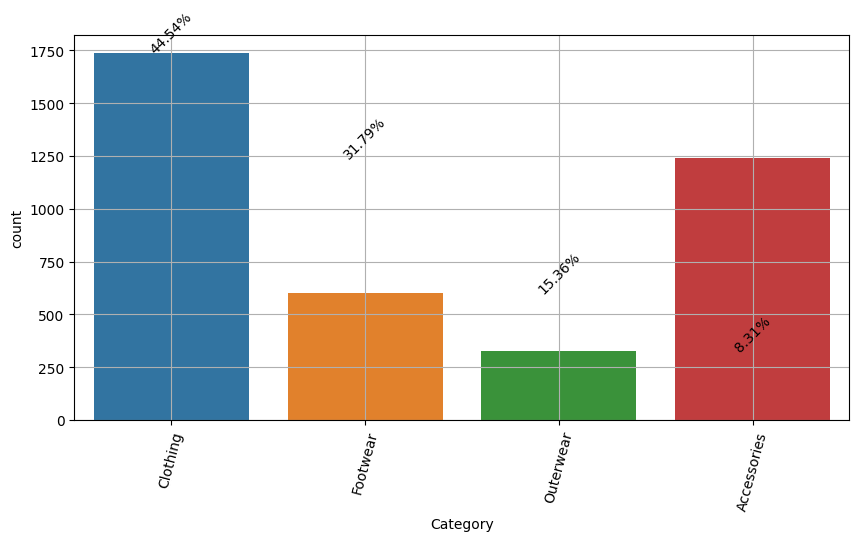

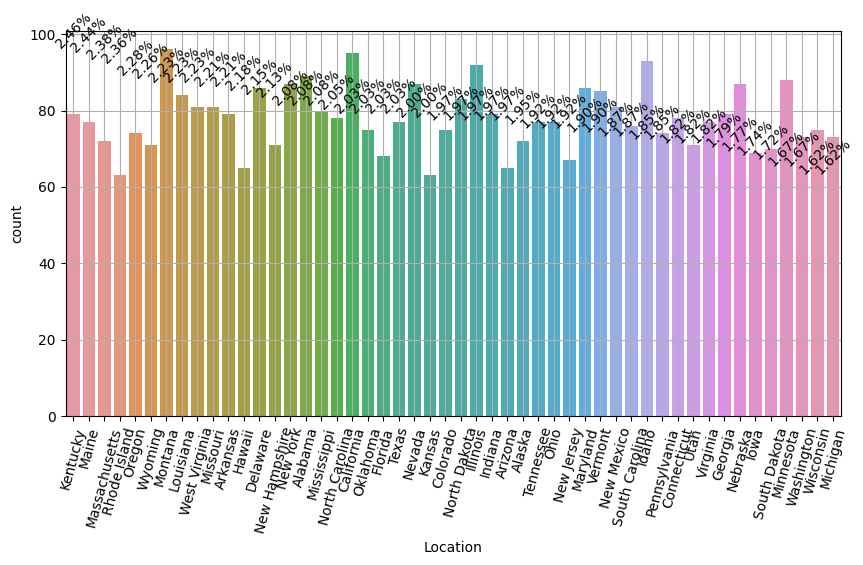

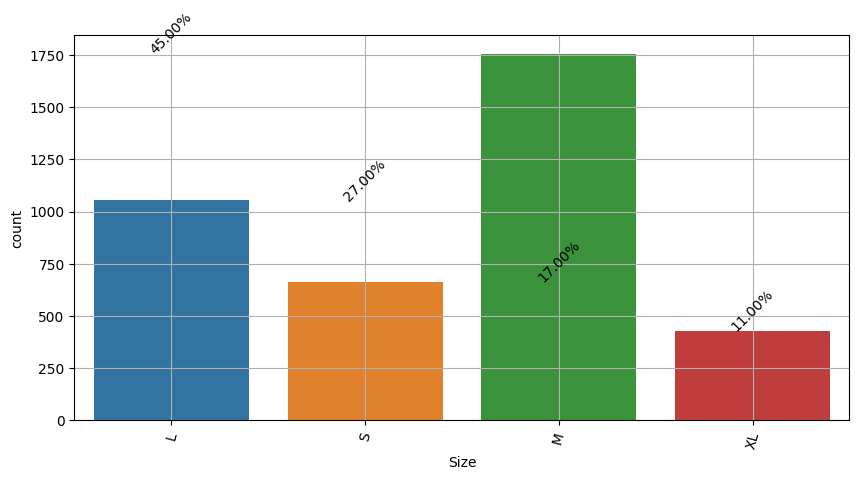

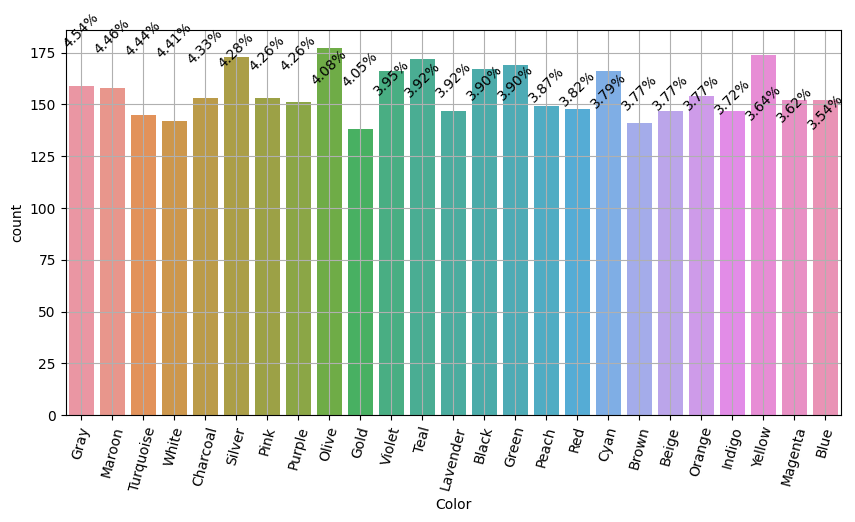

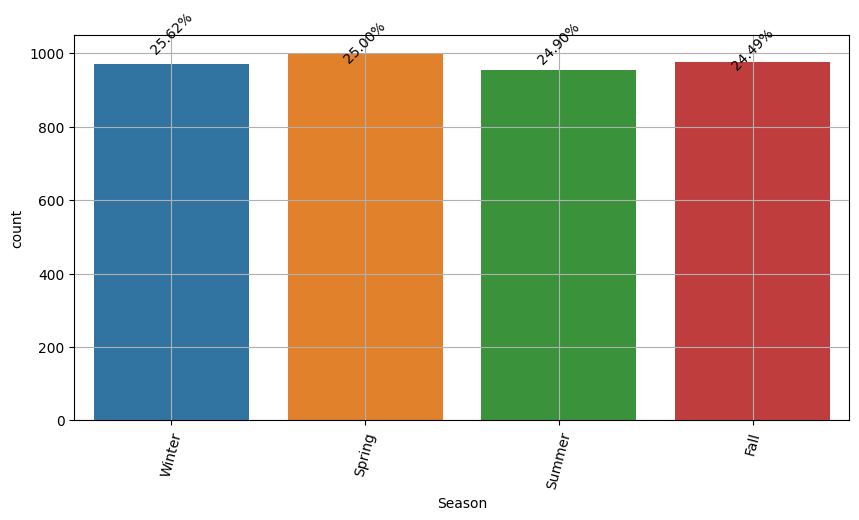

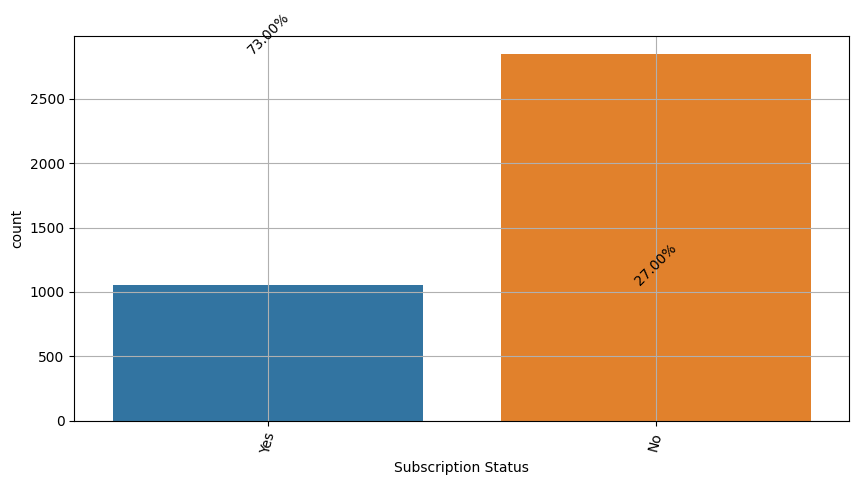

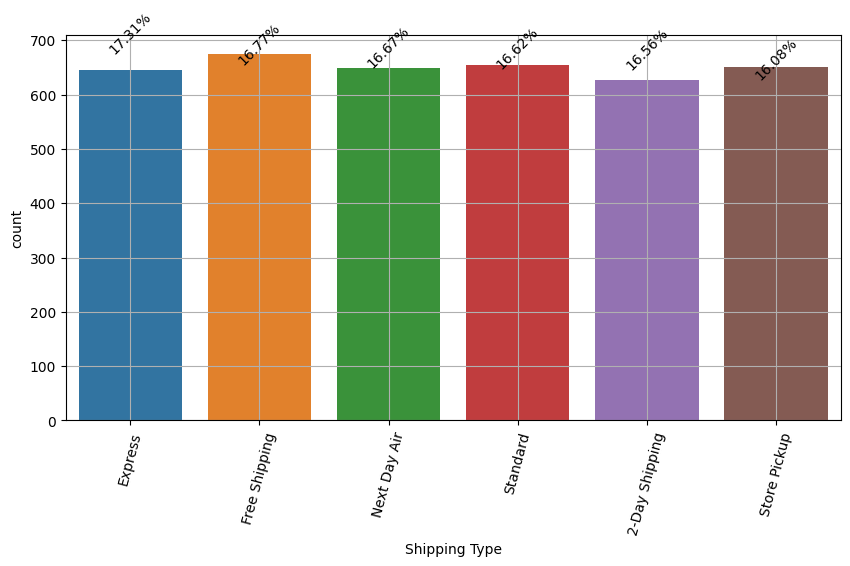

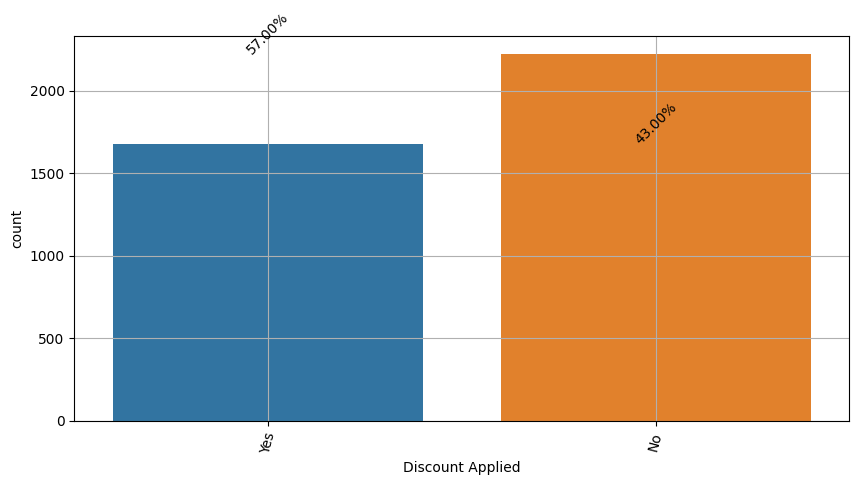

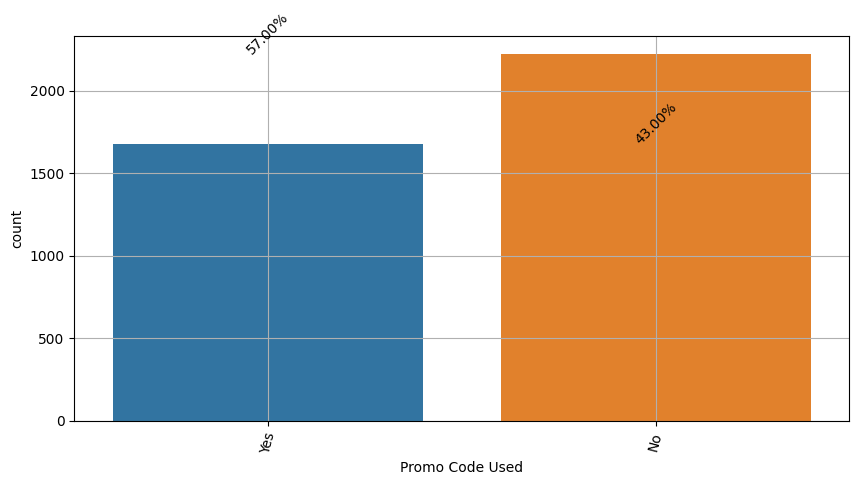

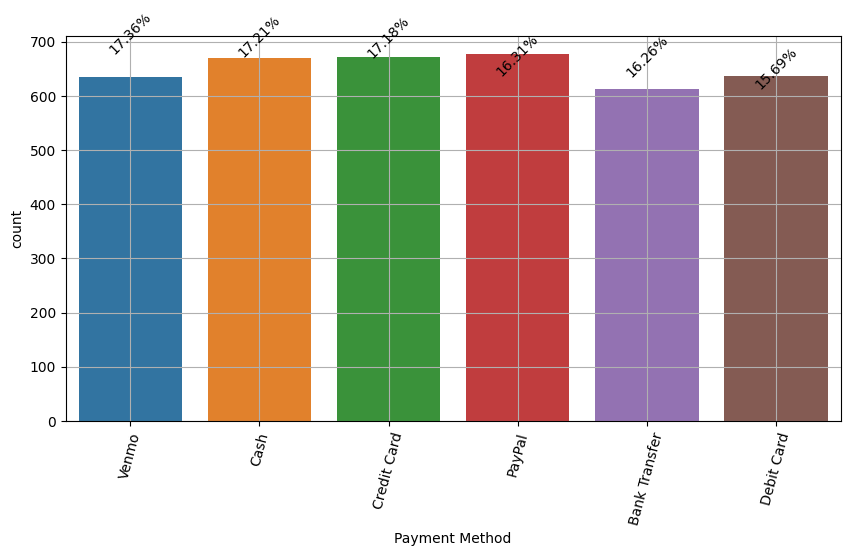

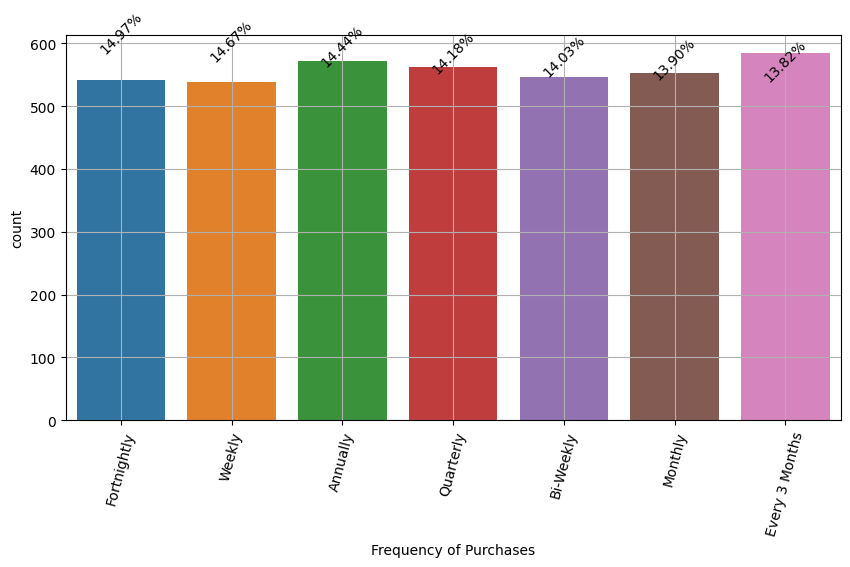

In [12]:
for i in data.select_dtypes(["object"]).columns:
    fig ,(fig1)=plt.subplots(1,figsize=(10,5))
    sns.countplot(x=data[i],ax=fig1)
    total = np.sum(data[i].count())
    plt.xticks(rotation=75)
    plt.grid(True)
    percentages = [(value / total) * 100 for value in list(data[i].value_counts())]
    for j, value in enumerate(list(data[i].value_counts())):
        plt.text(j,  value + 0.4,f'{percentages[j]:.2f}%', ha='center',rotation=45)
    plt.show()

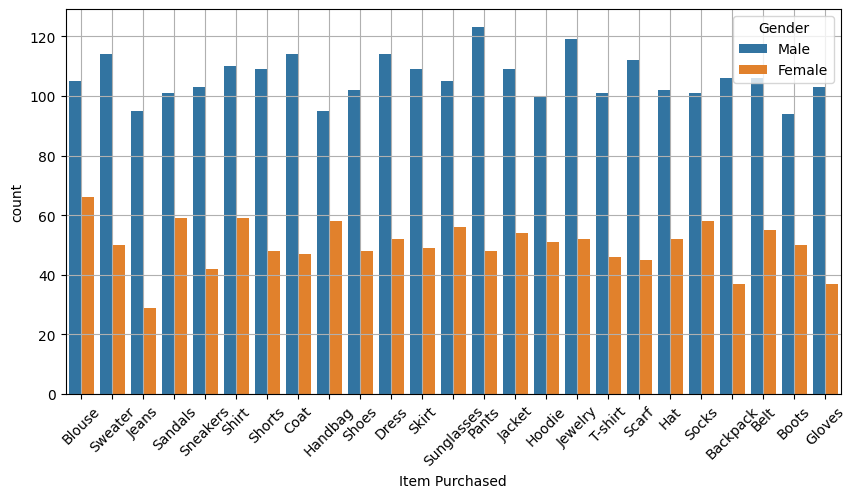

In [13]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x=data["Item Purchased"],hue=data["Gender"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Company need to make avail online shopping so that they can increase the selling of items because we can see that all items are purchased by male only......From that we can conclude that many of female are not able to purchase items...

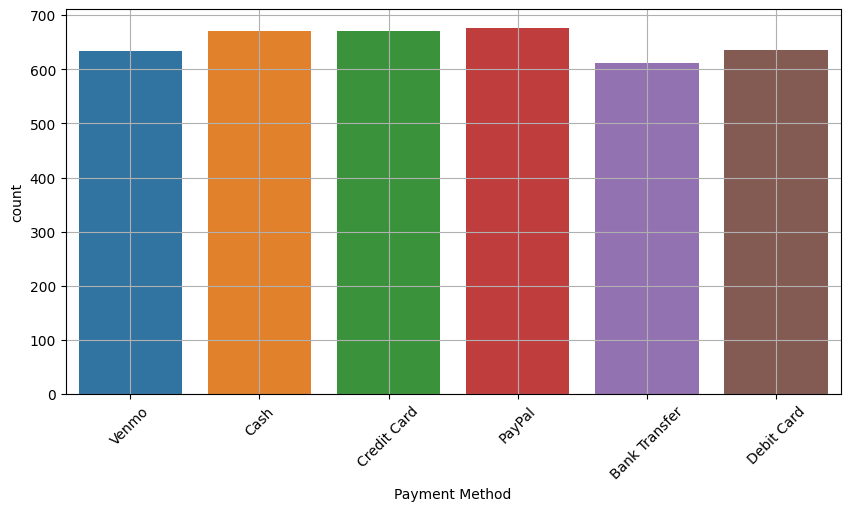

In [14]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x=data["Payment Method"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Here we can see that their no problem with the payment method

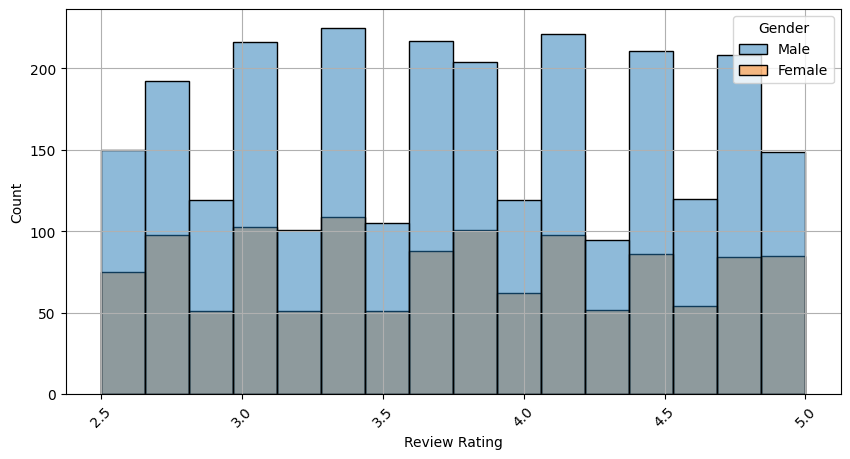

In [15]:
fig = plt.figure(figsize=(10,5))
sns.histplot(x=data["Review Rating"],hue=data["Gender"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

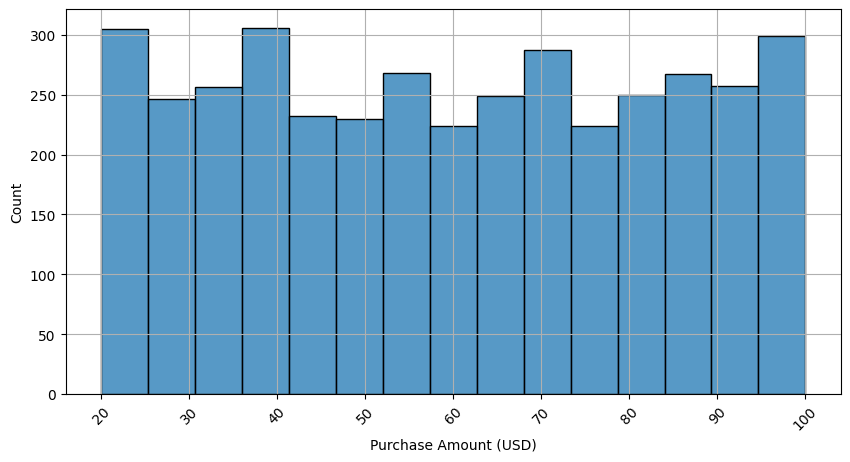

In [16]:
fig = plt.figure(figsize=(10,5))
sns.histplot(x=data["Purchase Amount (USD)"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [17]:
Category = data["Purchase Amount (USD)"].groupby(data["Category"]).sum()
Category.head()

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

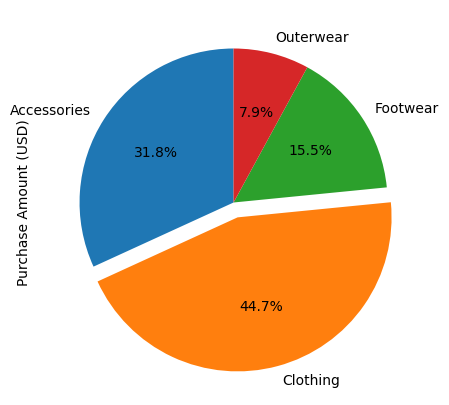

In [18]:
fig = plt.figure(figsize=(10,5))
Category.plot(kind="pie",autopct='%1.1f%%', startangle=90,explode=[0,0.1,0,0])
plt.show()

### Company has to increase their marketing ideas by providing offers and coupens for the OUTWEAR AND FOOTWEAR

In [46]:
Category_rating = pd.DataFrame(data["Review Rating"].groupby(data["Category"]).sum(),columns=["Review Rating"])
Category_rating.reset_index(inplace=True)
display(Category_rating)

,Category,Review Rating
0,Accessories,4673.1
1,Clothing,6467.1
2,Footwear,2270.6
3,Outerwear,1214.0


In [47]:
# Category_rating_list = Category_rating.Category.to_list()
# display(Category_rating_list)
value_count = pd.DataFrame(data["Category"].value_counts())
# value_count.reset_index(inplace=True)
# value_count.reset_index(inplace=True)
# value_count.set_index("level_0",inplace=True)
# value_count.reset_index({"index":"Category","Category":"Count"},inplace=True)
display(value_count)
Category_rating_list = list(value_count.index)
Category_rating_list

,Category
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


['Clothing', 'Accessories', 'Footwear', 'Outerwear']

In [48]:
def percentage(row):
    for i in Category_rating_list:
        if row["Category"]==i:
            y = value_count.loc[i,"Category"]
            row["Review Rating"] = (((row["Review Rating"]/(5*y))*100)/100)*5           
    return row
Category_rating = Category_rating.apply(percentage,axis=1)
Category_rating.rename({"Review Rating":"Average rating"},inplace=True)
Category_rating

,Category,Review Rating
0,Accessories,3.768629
1,Clothing,3.723143
2,Footwear,3.790651
3,Outerwear,3.746914


In [52]:
Category_rating_list = Category_rating["Review Rating"].to_list()

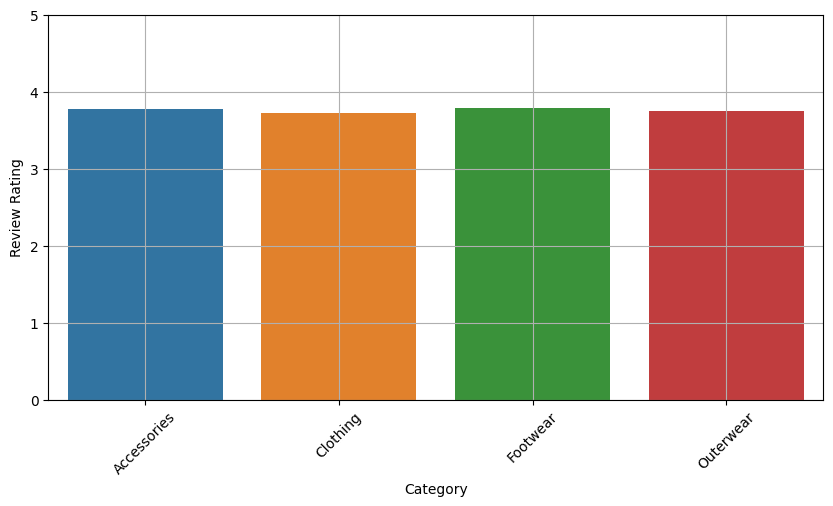

In [54]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=Category_rating["Category"],y=Category_rating["Review Rating"])
plt.xticks(rotation=45)
plt.ylim(0,5)
plt.grid(True)
plt.show()

# Avarage rating of each category is seems to 3.5 out of 5............hence company has to increase their item qualities...